<a href="https://colab.research.google.com/github/lasilva0/case-fortbrasil/blob/main/case_fortbrasil_lindem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Crregando os pacotes 
library(pacman)
p_load(tidyverse,lubridate, janitor, openxlsx, dplyr, ggplot2)

In [6]:
# Vamos carregar nossos bancos para a análise e resolução dos problemas
base  <- read.delim(file = "/content/dados fort brasil/Questão 1 - Base.txt")
base  <- as_tibble(base) 

base1 <- read.delim(file = "/content/dados fort brasil/Questão 2 - Base 1.txt")
base1 <- as_tibble(base1)

base2 <- read.delim(file = "/content/dados fort brasil/Questão 2 - Base 2.txt")
base2 <- as_tibble(base2)

base3 <- read.delim(file = "/content/dados fort brasil/Questão 2 - Base 3.txt")
base3 <- as_tibble(base3)

base4 <- read.delim(file = "/content/dados fort brasil/Questão 2 - Base 4.txt")
base4 <- as_tibble(base3)

base5 <- read.delim(file = "/content/dados fort brasil/Questão 2 - Base 5.txt")
base5 <- as_tibble(base5)

## Problema 1: 
O negócio da Fortbrasil consiste na oferta de crédito rápido e consciente para parceiros e clientes de classes emergentes, sendo nosso principal produto o cartão de crédito. Para a primeira questão, disponibilizamos algumas variáveis relacionadas à fatura dos clientes:

* **ID_CONTA**: Identificador da conta;
* **DT_VENCIMENTO**: Data vencimento da fatura;
* **DS_ROLAGEM**: Indicador que define se o cliente pagou a fatura do Mês anterior ou não. Se o valor for **FX0** quer dizer que o cliente pagou a fatura do mês anterior e se **FX1** quer dizer que o cliente não pagou a fatura do mês anterior;
* **VL_FATURA**: Valor da Fatura atual.

##### 1.1 - Baseado nessas informações, responda: Qual o percentual de faturas emitidas por mês no qual os clientes não pagaram a fatura anterior ?

Antes de prosseguir com a resolução desta questão, devemos proesseguir com a limpeza e transformação dos dados:

In [7]:
glimpse(base)

Rows: 2,728,249
Columns: 4
$ ID_CONTA      <int> 402467, 403001, 403499, 403670, 404183, 1307735, 1307790…
$ DT_VENCIMENTO <chr> "2019-01-01", "2019-01-01", "2019-01-01", "2019-01-01", …
$ DS_ROLAGEM    <chr> "FX0", "FX1", "FX0", "FX0", "FX1", "FX0", "FX0", "FX0", …
$ VL_FATURA     <dbl> 210.00, 1097.18, 1209.88, 667.40, 1239.52, 785.69, 266.0…


Percebemos que nossos dados possuem: 
* 2.728.249 linhas
* Temos duas variáveis do tipo caractere (DT_VENCIMENTO e DS_ROLAGEM) 
* Uma variável do tipo inteiro (ID_CONTA) 
* E uma variável do tipo double (VL_FATURA)

Desta forma é interessante que transformemos a variável DS_ROLAGEM para o tipo fator, para melhor agruparmos nas consultas e transformar a variável DT_VENCIMENTO para o tipo Date, que é o formato mais apropriado para data:    

In [8]:
base$DT_VENCIMENTO <- as_date(base$DT_VENCIMENTO)
base$DS_ROLAGEM <- as.factor(base$DS_ROLAGEM)

In [9]:
## Iremos ferificar se existe no nosso banco de dados algumas informações 
## faltantes para que possamos tratá-las e retirá-las (caso possível): 

table(is.na(base))
prop.table(table(is.na(base))) * 100  # calcula proporções


   FALSE 
10912996 


FALSE 
  100 

Percebemos que nossos dados não possuem valores faltantes e assim prosseguimos com a análise.

Agora vamos ao item 1.1: 

In [10]:
query <- base %>% select(DS_ROLAGEM, DT_VENCIMENTO) %>%
mutate(Data = DT_VENCIMENTO, mes = format(Data, "%m/%Y" )) %>% 
group_by(mes) %>% 
summarise(quantidade_fx1 = sum(ifelse(DS_ROLAGEM == 'FX1',1,0)),
quantidade_fx0 = sum(ifelse(DS_ROLAGEM == 'FX0',1,0)),
percentual_fx1 = quantidade_fx1/(quantidade_fx1 + quantidade_fx0)*100,
percentual_fx0 = quantidade_fx0/(quantidade_fx1 + quantidade_fx0)*100)

print(query) 

# A tibble: 9 x 5
  mes     quantidade_fx1 quantidade_fx0 percentual_fx1 percentual_fx0
  <chr>            <dbl>          <dbl>          <dbl>          <dbl>
1 01/2019          22835         290548           7.29           92.7
2 02/2019          27928         285921           8.90           91.1
3 03/2019          33432         273886          10.9            89.1
4 04/2019          25380         276950           8.39           91.6
5 05/2019          30321         271544          10.0            90.0
6 06/2019          25977         278389           8.53           91.5
7 07/2019          29889         281005           9.61           90.4
8 08/2019          28736         288331           9.06           90.9
9 09/2019          21955         235222           8.54           91.5


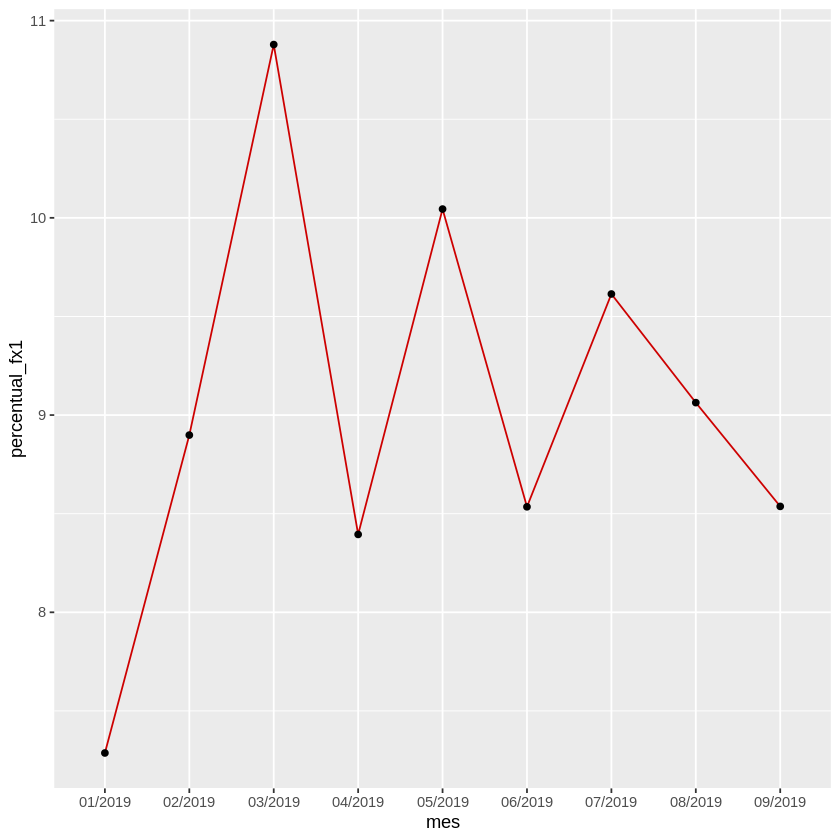

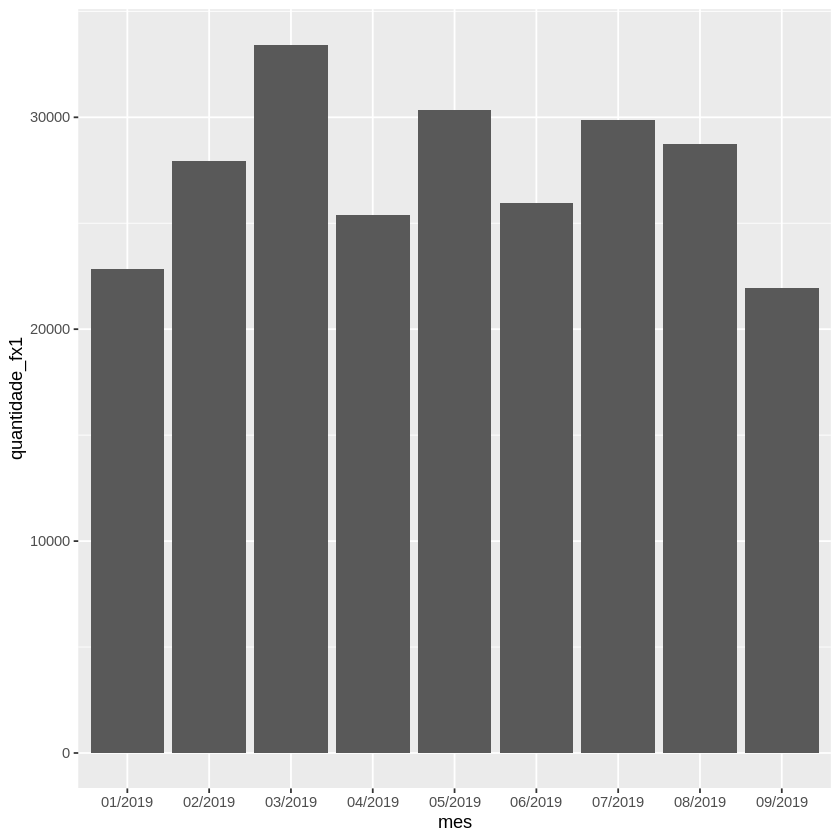

In [11]:
dados_view = data.frame(query)
ggplot(data = dados_view, aes(x = mes, y = percentual_fx1)) + geom_line(group = 1, color = 'red3') + geom_point()
ggplot(data = dados_view, aes(mes, quantidade_fx1)) + geom_col()

In [12]:
# Podemos extrair o mês que obteve o maior percentual de clientes que 
# não pagaram a fatura do mês # anterior: 
query %>% slice(which.max(percentual_fx1))

mes,quantidade_fx1,quantidade_fx0,percentual_fx1,percentual_fx0
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
03/2019,33432,273886,10.87863,89.12137


In [13]:
# Do mesmo modo, podemos obter o mês com menor percentual de clientes 
# que não pagaram a fatura no mês anterior: 
query %>% slice(which.min(percentual_fx1))

mes,quantidade_fx1,quantidade_fx0,percentual_fx1,percentual_fx0
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
01/2019,22835,290548,7.286611,92.71339


##### 1.2 – Tendo como referência todos os clientes que tiveram fatura emitida no mês de setembro, gere uma base para esses clientes com os seguintes calculados:

* Total de faturas emitidas nos últimos 6 meses (sem contar com a fatura de setembro);
* O valor médio de fatura nos últimos 6 meses (sem contar com a fatura de setembro);
* Quantidade de vezes que ele ficou sem pagar a fatura anterior nos últimos 6 meses (sem contar com a fatura de setembro). 

In [14]:
# clientes que tiveram fatura emitida no mês de setembro
cc  = base %>%  
  mutate(data = as_date(DT_VENCIMENTO))  %>%
  mutate(mes = floor_date(data,"month")) %>% 
  filter(data >= '2019-09-01') %>% 
  group_by(ID_CONTA,data) %>% select(ID_CONTA,data)

In [15]:
# Fazendo um join com os dados da base geral 
new.data = cc %>% inner_join(base, by = 'ID_CONTA') 

In [16]:
query2 = new.data  %>% 
  select(ID_CONTA,DS_ROLAGEM,DT_VENCIMENTO,VL_FATURA) %>%
  group_by(ID_CONTA,DS_ROLAGEM) %>% 
  filter(DT_VENCIMENTO < '2019-09-01') %>% 
  summarise(qtde_fatura_ult_6m= sum(ifelse(DT_VENCIMENTO < '2019-09-01',1,0)),
    vmedio_fatura = sum(VL_FATURA)/sum(ifelse(DT_VENCIMENTO < '2019-09-01',1,0)),
    qtde_faturas_ult_6m_fx1 = sum(ifelse(DS_ROLAGEM == 'FX1',1,0))) 
print(query2)

`summarise()` has grouped output by 'ID_CONTA'. You can override using the `.groups` argument.



# A tibble: 292,745 x 5
# Groups:   ID_CONTA [240,710]
   ID_CONTA DS_ROLAGEM qtde_fatura_ult_6m vmedio_fatura qtde_faturas_ult_6m_fx1
      <int> <fct>                   <dbl>         <dbl>                   <dbl>
 1    27717 FX0                         8        1588.                        0
 2    27789 FX0                         8         961.                        0
 3    30256 FX0                         8         451.                        0
 4    35473 FX0                         8         886.                        0
 5    35510 FX0                         8        1252.                        0
 6    35534 FX0                         8         407.                        0
 7    35576 FX0                         7          53.8                       0
 8    35663 FX0                         7         265.                        0
 9    35702 FX0                         8        2298.                        0
10    35707 FX0                         8         443.           

##### 1.3 - Utilizando como referência a base calculada na questão anterior, identifique qual das 3 variáveis calculadas tem o maior potencial de preditivo em relação a variável DS_ROLAGEM do mês de setembro. 

In [ ]:
# Bibliotecas que serão utilizadas 
p_load(rpart, rpart.plot)

Nos dados a variável objetivo ou *target* é a variável *DS_ROLAGEM* que indica se determinado cliente pagou ou não a fatura do mês anterior. As demais variáveis indicam a quantidade de faturas, a soma das faturas e a média das faturas nós últimos 6 meses. A metodologia que iremos apresentar a seguir, definem regras baseadas em árvores de decisão (*decision trees*). Uma árvore de decisão é uma forma de visualizar as regras de negócio que levam a determinados grupos de indivíduos, construídos com base em uma variável target. 

Dito isto, prosseguimos com nossa análise: 

In [19]:
# Vamos separar os dados em treino e teste 

set.seed(300121)

.data <- c("training", "test") %>%
  sample(nrow(query2), replace = T) %>%
  split(query2, .)

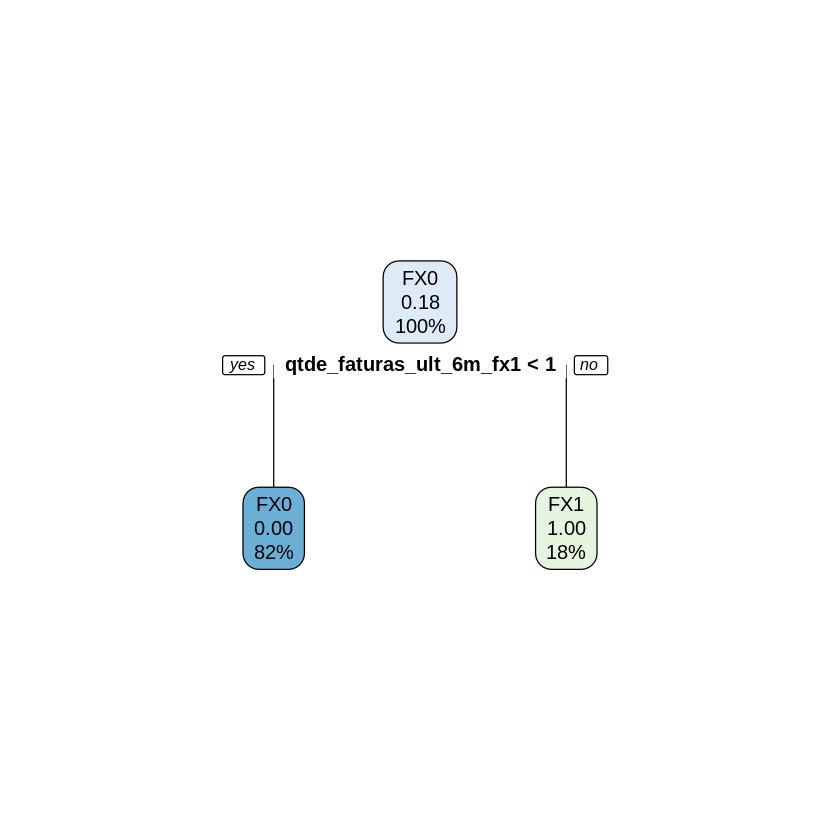

In [20]:
# Criar a árvore de decisão
rtree_fit <- rpart(DS_ROLAGEM ~ ., .data$training)
rpart.plot(rtree_fit)

Aqui percebemos que a variável que gera a menor entropia (variável que gera a primeira divisão nos dados) é a variável *DS_ROLAGEM*. Um conceito muito relacionado à entropia é o ganho informação. O ganho de informação ocorre quando existe uma nova divisao nos dados que provoca uma menor entropia.  

Conseguimos verificar a primeira regra definida: se o cliente pagou todas as faturas dos meses anteriores nos últimos 6 meses, então ele possuirá status de DS_ROLAGEM igual a FX0, isto é, que ele pagou a fatura do mês anterior. Isto corresponde 82 % do total de clientes. Então, podemos observar que a variável que possivelmente será a maior preditora da variavel DS_ROLAGEM será *qtde_faturas_ult_6m_fx1*. 

# Problema 2

O ciclo de crédito do cartão Fortbrasil consiste em 3 etapas: Aquisição, Manutenção e Cobrança. O cliente entra em cobrança com 5 dias de atraso, e quando atinge a marca de 65 dias tem o cartão cancelado e então para realizar o pagamento da dívida precisa realizar um acordo. A FortBrasil irá fazer uma nova campanha para aumentar a adesão aos acordos e gostaria de traçar uma estratégia de cobrança utilizando as informações históricas e técnicas de modelagem preditivas. Segue abaixo as definições das variáveis:

* **ID_CONTA**: Identificador da conta;
* **DT_ACORDO**: Data do acordo;
* **NU_DIAS_ATRASO**: Número de dias após o vencimento que esse cliente está sem pagar;
* **VALOR_CRELIQ**: Valor da dívida do cliente quando ele ultrapassa os 65 dias de atraso;
* **DIVIDA_ATUAL**: Dívida atualizada com juros;
* **RESPOSTA**: Se for 1, significa que o cliente aderiu aquele acordo. Ou seja, efetuou o pagamento da entrada. Se for 0, caso contrário.
* **QTD_PARCELAMENTO_XM**: Quantidade de parcelamentos de fatura aderidos X meses antes da fatura que ele deixou de pagar.
* **LIMITE**: Limite total do cliente;
* **QTD_EXTRATOS**: Quantidade de Faturas emitidas;
* **QTD_FX0**: Quantidade de faturas emitidas em dia;
* **QTD_FX1**: Quantidade de faturas emitidas no qual o cliente não pagou a fatura do mês anterior;
* **QTD_FX2**: Quantidade de faturas emitidas no qual o cliente não pagou as duas ultimas faturas anteriores;
* **QTD_ACIONAMENTO**: Quantidade de vezes que ligamos para os clientes para cobrar a sua dívida;
* **QTD_CP**: Quantidade de vezes que a ligação foi atendida, mas não houve contato com o cliente;
* **QTD_CPC**: Quantidade de vezes que o próprio cliente atendeu a ligação de cobrança.	
* **DEFINIÇÃO**: Acordo é uma proposta de negociação da dívida por parte da Fortbrasil para clientes que estão com mais de 180 dias de atraso.

Baseado nessas informações, responda:


* 2.1 Qual o percentual de adesão mensal por faixa de atraso (Histórico)?.
* 2.2 Crie um relatório analítico no Power BI para acompanhar a adesão dos acordos e criar insights de como melhorar essa adesão.
* 2.3 Qual modelo você utilizaria para traçar uma estratégia objetivando o aumento da adesão dos acordos? (Descreva a técnica utilizada).
* 2.4 Quais indicadores e ferramentas você utilizaria para avaliar a performance/aderência desse modelo? (Descreva os indicadores utilizados).
* 2.5 Apresente o modelo desenvolvido utilizando a técnica do item (2.2) e as técnicas de avaliação descritas no item (2.3).

##### Qual modelo você utilizaria para traçar uma estratégia objetivando o aumento da adesão dos acordos? (Descreva a técnica utilizada).

In [21]:
# Base de dados que utilizaremos 
head(base1)

ID_CONTA,DT_ACORDO,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA
<int>,<chr>,<int>,<dbl>,<dbl>,<int>
1194908,2018-11-22,221,324.38,463.73,0
1447997,2018-11-22,191,334.82,451.56,1
1035415,2018-11-22,252,1682.26,2554.18,0
1069434,2018-11-22,231,1625.01,2368.65,0
1427566,2018-11-22,270,320.07,503.25,0
1114924,2018-11-22,301,1458.19,2435.04,0


In [22]:
# Vamos transformar somente a variável DT_ACORDO em formato Date: 
base1$DT_ACORDO <- as_date(base1$DT_ACORDO)
glimpse(base1)

Rows: 72,533
Columns: 6
$ ID_CONTA       <int> 1194908, 1447997, 1035415, 1069434, 1427566, 1114924, 1…
$ DT_ACORDO      <date> 2018-11-22, 2018-11-22, 2018-11-22, 2018-11-22, 2018-1…
$ NU_DIAS_ATRASO <int> 221, 191, 252, 231, 270, 301, 262, 311, 280, 196, 221, …
$ VALOR_CRELIQ   <dbl> 324.38, 334.82, 1682.26, 1625.01, 320.07, 1458.19, 493.…
$ DIVIDA_ATUAL   <dbl> 463.73, 451.56, 2554.18, 2368.65, 503.25, 2435.04, 763.…
$ RESPOSTA       <int> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…


In [23]:
# Verificando se a base possui valores faltantes 

table(is.na(base1))


 FALSE 
435198 

In [27]:
# Pode-se verificar que esta base não possui dados faltantes. Prosseguimos com a análise: 

adesao_mensal <- base1 %>% filter(NU_DIAS_ATRASO >= 65) %>%
  select(ID_CONTA,DT_ACORDO,RESPOSTA,NU_DIAS_ATRASO) %>% 
  mutate(mes = format(DT_ACORDO,"%m/%Y")) %>% 
  group_by(mes) %>%
  summarise(qtde_acordo = sum(ifelse(RESPOSTA == '1',1,0)),
  qtde_n_acordo = sum(ifelse(RESPOSTA == '0',1,0)),
  pct_acordo   = qtde_acordo/(qtde_acordo + qtde_n_acordo)*100,
  pct_n_acordo = qtde_n_acordo/(qtde_acordo + qtde_n_acordo)*100) 

adesao_mensal

mes,qtde_acordo,qtde_n_acordo,pct_acordo,pct_n_acordo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
03/2019,310,22328,1.369379,98.63062
04/2019,283,528,34.895191,65.10481
06/2019,965,30120,3.104391,96.89561
11/2018,587,17412,3.261292,96.73871


##### 2.3 Qual modelo você utilizaria para traçar uma estratégia objetivando o aumento da adesão dos acordos? (Descreva a técnica utilizada).

Nesse tipo de problema que foi apresentado, temos uma variável resposta do tipo binária que assume apenas dois valores distintos: 1 (se o cliente aderiu o acordo) e 0 caso contrário. Existem também as diversas variáveis apresentadas que poderiam ser utilizadas para explicar a variável resposta. Assim, podemos pensar num modelo de regressão logístico utilizando a abordagem de MLGS (Modelos Lineares Generalizados) com função de ligação *logit* e verificar quais variáveis são significativas ou não para o modelo. Para isso podem ser utilizados métodos de seleção de variáveis. Um dos métodos mais conhecidos é o método *stepwise* que seleciona todas as combinações possíveis de variáveis e testa a significância das mesmas e ao final retorna a combinação que melhor representa o modelo. É um tipo de saída. 

Outra maneira consiste na utilização de árvores de decisão que de forma simples particiona o conjunto de dados em subgrupos de menor desordem (menor entropia). As partições ocorrem a partir de características (*features*) e os resultados obtidos são as probabiidades de uma nova observação pertencer a uma determinada classe. Podem existir problemas de overfiting quando os ramos das árvores são excessivos e não há possibilidade de generalização de regras. Neste caso, temos o processo de poda nas árvores de decisão, que simplificam as regras e tornam a árvore de decisão mais interpretável e com regras mais consistentes, e por consequência, melhores classificações. 

Outra alternativa seria a utilização de florestas aleatórias (*random forest*). Este tipo de modelo combina diversas árvores de decisão e gera a resposta a partir dos resultados que foram obtidos. Assim como nas árvores de decisão, existem nesse caso processos de poda conhecido como poda de ramos. 

Uma outra técnica que tem ganhado bastante popularidade é a Light GBM que é uma estrutura de aumento de gradiente que usa algoritmo de aprendizagem baseado em árvore. A diferença dessa técnica para as duas técnicas apresentadas anteriormente é que Light GBM cresce árvore verticalmente, enquanto os outros algoritmos crescem árvores horizontalmente, o que significa que Light GBM cresce árvore em forma de folha enquanto outro algoritmo cresce em nível. Ele escolherá a folha com perda máxima de delta para crescer. Ao crescer a mesma folha, o algoritmo Leaf-wise pode reduzir mais perdas do que um algoritmo de nível. Assim, usaremos três métodos para a resolução do problema: 

* Regressão Logística, Árvores de Decisão e Florestas Aleatórias, 

comparando as performances dos modelos. 


##### 2.4 Quais indicadores e ferramentas você utilizaria para avaliar a performance/aderência desse modelo? (Descreva os indicadores utilizados).

Para avaliar esses modelos um indicador bastante conehcido na literatura é a **matriz de confusão**. Esta matriz verifica quantas instâncias são classificadas como verdadeiro positivo (VP), falso positivo (FP), verdadeiro negativo (VN) e falso negativo (FN). Existem várias maneiras de trabalhar com essas métricas, e a melhor maneira de validar um modelo com satisfatório é na análise de várias dessas métricas. Algumas delas podem ser listadas: 

* **Acurácia**: Performance geral do modelo. 

\begin{equation*}
\frac{VP + VN}{(VP + VN) + (FP + FN)}.
\end{equation*}

* **Precisão**: Proporção de observações positivas previstas corretamente.

\begin{equation*}
\frac{VP}{VP+FP}.
\end{equation*}

* **Sensibilidade**: Proporção de observações positivas previstas corretamente com relação a todas observações da classe positiva real.

\begin{equation*}
\frac{VP}{VP+FN}.
\end{equation*}


##### 2.5 Apresente o modelo desenvolvido utilizando a técnica do item (2.2) e as técnicas de avaliação descritas no item (2.3).

In [ ]:
# Vamos utilizar as seguintes bibliotecas para a análise 
p_load(plyr,imbalance,caret,e1071,ROSE,rpart,ROCR, lightgbm, methods, Matrix, randomForest)

In [ ]:
base_geral <- join_all(list(base1,base2,base3,base4,base5), by = c("ID_CONTA","DT_ACORDO"))
head(base_geral) 

In [32]:
# Só pela leitura dos dados já notamos diversos valores NA's.
glimpse(base_geral)

Rows: 72,533
Columns: 23
$ ID_CONTA             <int> 1194908, 1447997, 1035415, 1069434, 1427566, 1114…
$ DT_ACORDO            <date> 2018-11-22, 2018-11-22, 2018-11-22, 2018-11-22, …
$ NU_DIAS_ATRASO       <int> 221, 191, 252, 231, 270, 301, 262, 311, 280, 196,…
$ VALOR_CRELIQ         <dbl> 324.38, 334.82, 1682.26, 1625.01, 320.07, 1458.19…
$ DIVIDA_ATUAL         <dbl> 463.73, 451.56, 2554.18, 2368.65, 503.25, 2435.04…
$ RESPOSTA             <int> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ QTD_PARCELAMENTO_3M  <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ QTD_PARCELAMENTO_6M  <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ QTD_PARCELAMENTO_12M <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ LIMITE               <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ LIMITE               <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ QTD_CPC_10D          <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ QTD_CPC_1M   

In [34]:
# percebe-se que os dados são desbalanceados , ou seja, aproximadamente 3% dos clientes 
# notando-se um nivel altíssimo de desacordo 
prop.table(table(base_geral$RESPOSTA))*100 


        0         1 
97.042725  2.957275 

In [35]:
base_geral[is.na(base_geral)] <- 0 # substituindo os valores faltantes por 0 
head(base_geral[,1:7])

,ID_CONTA,DT_ACORDO,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA,QTD_PARCELAMENTO_3M
,<int>,<date>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,1194908,2018-11-22,221,324.38,463.73,0,0
2,1447997,2018-11-22,191,334.82,451.56,1,0
3,1035415,2018-11-22,252,1682.26,2554.18,0,0
4,1069434,2018-11-22,231,1625.01,2368.65,0,0
5,1427566,2018-11-22,270,320.07,503.25,0,0
6,1114924,2018-11-22,301,1458.19,2435.04,0,0


In [36]:
# Verificar se foram todos substituídos 
sum(is.na(base_geral)) 

[1] 0

##### Vamos preparar nossa base para treino e teste (vamos particionar 70% para treino e 30% pare teste) 

In [37]:
set.seed(300122)
particao <- createDataPartition(base_geral$RESPOSTA, p = 0.7, list = FALSE)
treino <- base_geral[particao,]  # gera os índices dos clientes tal que sejam 70% de todas as observações 
teste  <- base_geral[-particao,] # Pega os índices restantes para teste 

In [38]:
# Vamos separar o conjunto de dados de treino em variável resposta e preditora 
resp_treino <- treino[,6]
pred_treino <- treino[,-c(1,6)]

In [39]:
# Identificando variáveis com variância baixa 
v_baixas <- nearZeroVar(pred_treino)

In [40]:
# Selecionando da base de treino somente as variáveis que são importantes, a fim de otimizar o desempenho do modelo
pred_treino <- pred_treino[,-v_baixas]
treino <- cbind(resp_treino,pred_treino)

In [41]:
# Selecionando as variáveis para o conjunto de teste 
resp_teste <- teste[,6]
pred_teste <- teste[,-c(6,1)]

In [42]:
# Retirando as variáveis de baixa variabilidade no conjunto de teste 
pred_teste <- pred_teste[,-v_baixas]
teste <- cbind(resp_teste,pred_teste)

#### **Modelagem dos dados**

Vamos ajustar primeiramente o modelo logístico para ver como se comporta na presença dos dados desbalenceados: 

In [43]:
modelo <- glm(treino$resp_treino~., data  = treino, family = binomial(link = 'logit')) 

In [44]:
predito   <- predict(modelo, newdata = pred_teste, type = "response") # predizendo as probabilidades de adesão 
predito   <- as.factor(ifelse(predito > 0.5,1,0))

#### **Validação do modelo**

In [45]:
confusionMatrix(predito, as_factor(resp_teste), positive = "1")

Warning message in confusionMatrix.default(predito, as_factor(resp_teste), positive = "1"):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 21111   648
         1     0     0
                                          
               Accuracy : 0.9702          
                 95% CI : (0.9679, 0.9724)
    No Information Rate : 0.9702          
    P-Value [Acc > NIR] : 0.5104          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.00000         
            Specificity : 1.00000         
         Pos Pred Value :     NaN         
         Neg Pred Value : 0.97022         
             Prevalence : 0.02978         
         Detection Rate : 0.00000         
   Detection Prevalence : 0.00000         
      Balanced Accuracy : 0.50000         
                                          
       'Positive' Class : 1               
                  

Podemos observar que a acurácia do modelo é alta (97,02%). A acurácia é a proporção de instâncias que foram corretamente previstas, sejam elas verdadeiras positivas ou verdadeiras negativas. No entanto a sensibilidade do modelo (a proporção de instâncias positivas que foram identificadas corretamente) é zero. Assim o modelo prevê apenas a classe que não fez acordo. Deve-se então buscar formas de balanceamento para melhorar a previsão de adesão. Pode-se destacar alguns métodos bastante conhecidos na literatura:

* **under** 
* **over**
* **both**

In [46]:
# Analisando o desbalanceamento 

under_treino <- ovun.sample(resp_treino ~., data = treino, method = "under")$data 

over_treino  <- ovun.sample(resp_treino ~., data = treino, method = "over")$data

both_treino  <- ovun.sample(resp_treino ~., data = treino, method = "both",p = 0.5)$data

In [ ]:
# Método: regressão logística 

set.seed(300123)
mod_under <- glm(resp_treino~.,data=under_treino,family=binomial(link='logit'))
predito_under <- predict(mod_under,newdata=pred_teste,type="response")
predito_under <- as.factor(ifelse(predito_under > 0.5,1,0))

mod_over=glm(resp_treino~.,data=over_treino,family=binomial(link='logit'))
predito_over <- predict(mod_over,newdata=pred_teste,type="response")
predito_over <- as.factor(ifelse(predito_over > 0.5,1,0))

mod_both=glm(resp_treino~.,data=both_treino,family=binomial(link='logit'))
predito_both <- predict(mod_both,newdata=pred_teste,type="response")
predito_both <- as.factor(ifelse(predito_both > 0.5,1,0))

# Método: Árvores de Decisão 
contr=rpart.control(maxdepth = 10)

mod_under_tree <- rpart(resp_treino ~ ., data = under_treino,method = "class",
control = contr,parms = list(split = 'gini'))
predito_under_tree <- predict(mod_under_tree,newdata = pred_teste)
predito_under_tree <- as.factor(ifelse(predito_under_tree[,2] > 0.5,1,0))

mod_over_tree=rpart(resp_treino ~ ., data = over_treino,method = "class",
control = contr, parms = list(split = 'gini'))
predito_over_tree <- predict(mod_over_tree,newdata = pred_teste)
predito_over_tree <- as.factor(ifelse(predito_over_tree[,2] > 0.5,1,0))

mod_both_tree=rpart(resp_treino ~ ., data = both_treino,method = "class",
control = contr,parms = list(split = 'gini'))
predito_both_tree <- predict(mod_both_tree,newdata = pred_teste)
predito_both_tree <- as.factor(ifelse(predito_both_tree[,2] > 0.5,1,0))

# Método: Florestas Aleatórias 

mod_under_fa <- randomForest(as.factor(resp_treino)~., 
data = under_treino,maxnodes=10,importance=TRUE,ntree=1000,mtry=10)
predito_under_fa <- predict(mod_under_fa,newdata=pred_teste,type="response")

mod_over_fa <- randomForest(as.factor(resp_treino)~.,
data = over_treino,maxnodes=10,importance=TRUE,ntree=1000,mtry=10)
predito_over_fa <- predict(mod_over_fa,newdata=pred_teste,type="response")

mod_both_fa <- randomForest(as.factor(resp_treino)~.,
data = both_treino,maxnodes=10,importance=TRUE,ntree=1000,mtry=10)
predito_both_fa <- predict(mod_both_fa,newdata=pred_teste,type="response")


In [48]:
# Validação dos modelos 
val_under <- confusionMatrix(predito_under,as.factor(resp_teste),positive = "1")
val_over  <- confusionMatrix(predito_over, as.factor(resp_teste),positive = "1")
val_both  <- confusionMatrix(predito_both, as.factor(resp_teste),positive = "1")


val_under_tree <- confusionMatrix(predito_under_tree,
as.factor(resp_teste),positive = "1")
val_over_tree  <- confusionMatrix(predito_over_tree,
as.factor(resp_teste),positive = "1")
val_both_tree  <- confusionMatrix(predito_both_tree,
as.factor(resp_teste),positive = "1")


val_under_fa <- confusionMatrix(predito_under_fa,as.factor(resp_teste),positive = "1")
val_over_fa  <- confusionMatrix(predito_over_fa, as.factor(resp_teste),positive = "1")
val_both_fa  <- confusionMatrix(predito_both_fa, as.factor(resp_teste),positive = "1")

val <- cbind(val_under$byClass[c(1,5)],val_over$byClass[c(1,5)],
val_both$byClass[c(1,5)],
val_under_tree$byClass[c(1,5)],val_over_tree$byClass[c(1,5)],
val_both_tree$byClass[c(1,5)],val_under_fa$byClass[c(1,5)],
val_over_fa$byClass[c(1,5)],val_both_fa$byClass[c(1,5)])

# Obtendo a acurácia dos modelos com os métodos de balanceamento
val_acur <- cbind(val_under$overall[1],val_over$overall[1],
val_both$overall[1],val_under_tree$overall[1],val_over_tree$overall[1],
val_both_tree$overall[1],val_under_fa$overall[1],val_over_fa$overall[1],
val_both_fa$overall[1])

In [49]:
names <- c("Logística Under","Logística Over","Logística Both",
"Árvore de dec. Under",
"Árvore de dec. Over","Árvore de dec. Both",
"Floresta Aleatória Under","Floresta Aleatória Over","Floresta Aleatória Both")
colnames(val)=names
colnames(val_acur)=names
rbind(val_acur,val)


,Logística Under,Logística Over,Logística Both,Árvore de dec. Under,Árvore de dec. Over,Árvore de dec. Both,Floresta Aleatória Under,Floresta Aleatória Over,Floresta Aleatória Both
Accuracy,0.52001471,0.49910382,0.5046647,0.64286043,0.57934648,0.67645572,0.6447447,0.67411186,0.67636380
Sensitivity,0.62345679,0.66049383,0.6543210,0.56635802,0.63271605,0.54012346,0.5694444,0.54783951,0.54320988
Precision,0.03809883,0.03853426,0.0386227,0.04670994,0.04396783,0.04935138,0.0471867,0.04962953,0.04959143


Percebemos que o modelo que possui maior acurácia é o modelo Random Forest, possuindo valores de acurácia superiores ao do modelo Logístico e de Árvore de decisão, com valores razoáveis de sensibilidade. Dentre os modelos de Floresta Aleatória, o que utiliza o método de balanceamento *both* possui uma maior acurácia e sensibilidade com relação aos outros. 